<a href="https://colab.research.google.com/github/Noob919/Diabetes_Predictions/blob/main/Models/Forward_Selection/Random_Forest_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [3]:
path = "https://raw.githubusercontent.com/Noob919/Diabetes_Predictions/main/DataUsed/diabetes_binary_health_indicators_BRFSS2015.csv"
df =  pd.read_csv(path)
Scaler = StandardScaler()
X =  df.drop('Diabetes_binary', axis =1)
y = df['Diabetes_binary']
X_scaler = Scaler.fit_transform(X)

In [4]:
clflr = RandomForestClassifier()

In [5]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [7]:
sfs = SFS(clflr, 
           k_features= (1,21), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=3).fit(X_scaler,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  3.8min finished

[2022-07-23 21:48:57] Features: 1/21 -- score: 0.8606669820245979[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.8min finished

[2022-07-23 21:52:47] Features: 2/21 -- score: 0.8606669820245979[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:  4.1min finished

[2022-07-23 21:56:51] Features: 3/21 -- score: 0.8616209397666351[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [8]:
list_f = X.columns[[sfs.k_feature_idx_]]
list_f

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Index(['HighBP', 'HighChol', 'BMI', 'GenHlth'], dtype='object')

In [9]:
sfs.k_score_

0.8641477451907916

In [10]:
df_f = X[list_f]
df_f.shape
X_f =  df_f
y = df['Diabetes_binary']
X_train_f, X_test_f, y_train, y_test = train_test_split(X_f, y, test_size=0.3, random_state=42)

In [11]:
X_train_f = Scaler.fit_transform(X_train_f)
X_test_f = Scaler.fit_transform(X_test_f) 
print("Shape of train set",X_train_f.shape)
print("Shape of test set",X_test_f.shape)

Shape of train set (177576, 4)
Shape of test set (76104, 4)


In [13]:
clflr = RandomForestClassifier()
clflr.fit(X_train_f, y_train)
pred  = clflr.predict(X_test_f)
print("Accuracy Score",accuracy_score(y_test,pred))
print("f1 Score",f1_score(y_test,pred,zero_division=1))
print("Recall Score", recall_score(y_test,pred,zero_division=1))
print('Precison Score', precision_score(y_test,pred, zero_division=1))

Accuracy Score 0.8651713444759802
f1 Score 0.2007944543967599
Recall Score 0.12277359748547481
Precison Score 0.5508547008547009


Text(0.5, 1.0, 'Confusion metrics for Random Forest on Test Set')

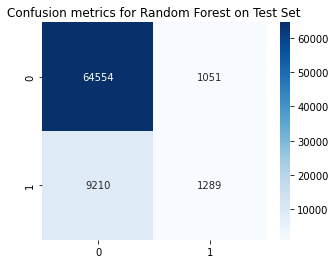

In [14]:
plt.figure(figsize = (5,4))
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix, annot=True,fmt = 'd', cmap = 'Blues')
plt.title('Confusion metrics for Random Forest on Test Set')

Accuracy Score 0.8657983060773978
f1 Score 0.21362811417257876
Recall Score 0.13027729705799493
precison Score 0.5930743862220593


Text(0.5, 1.0, 'Confusion metrics for Random Forest on Train set')

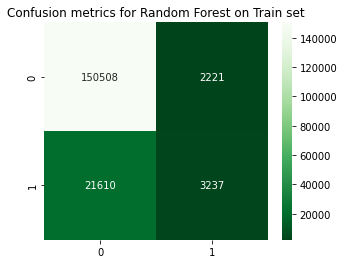

In [15]:
pred_train  = clflr.predict(X_train_f)
print("Accuracy Score",accuracy_score(y_train, pred_train))
print("f1 Score",f1_score(y_train, pred_train ))
print("Recall Score", recall_score(y_train, pred_train ))
print('precison Score', precision_score(y_train, pred_train ))
plt.figure(figsize = (5,4))
cf_matrix = confusion_matrix(y_train, pred_train)
sns.heatmap(cf_matrix, annot=True,fmt = 'd', cmap = 'Greens_r')
plt.title('Confusion metrics for Random Forest on Train set')

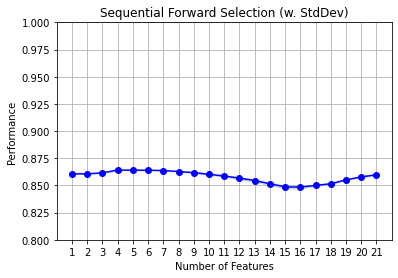

In [16]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()